In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pydaqmx_helper.adc import ADC
from pydaqmx_helper.dac import DAC

In [44]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [45]:
cal_volts = [0,1,2,3,4,5]
cal_freq = [1, 1.355, 1.716, 2.082, 2.443, 2.800]

In [46]:
def volt_freq(freq): #converting voltage
    a, b = np.polyfit(cal_freq, cal_volts, 1)
    v = a*freq + b
    return v

In [48]:
myADC = ADC()
myADC.addChannels([0, 1], minRange=0, maxRange=10)

Activated Channel 0
Activated Channel 1


In [98]:
myDAC = DAC(0)
myDAC.writeVoltage(volt_freq(1.4))

In [97]:
volts = np.arange(1, 2.8, 0.1)

myDAC.writeVoltage(volt_freq(1.4))

data = myADC.sampleVoltages(200,5000)

samples0 = data[0]  # tuple of samples associated with channel with id 0
samples2 = data[1]

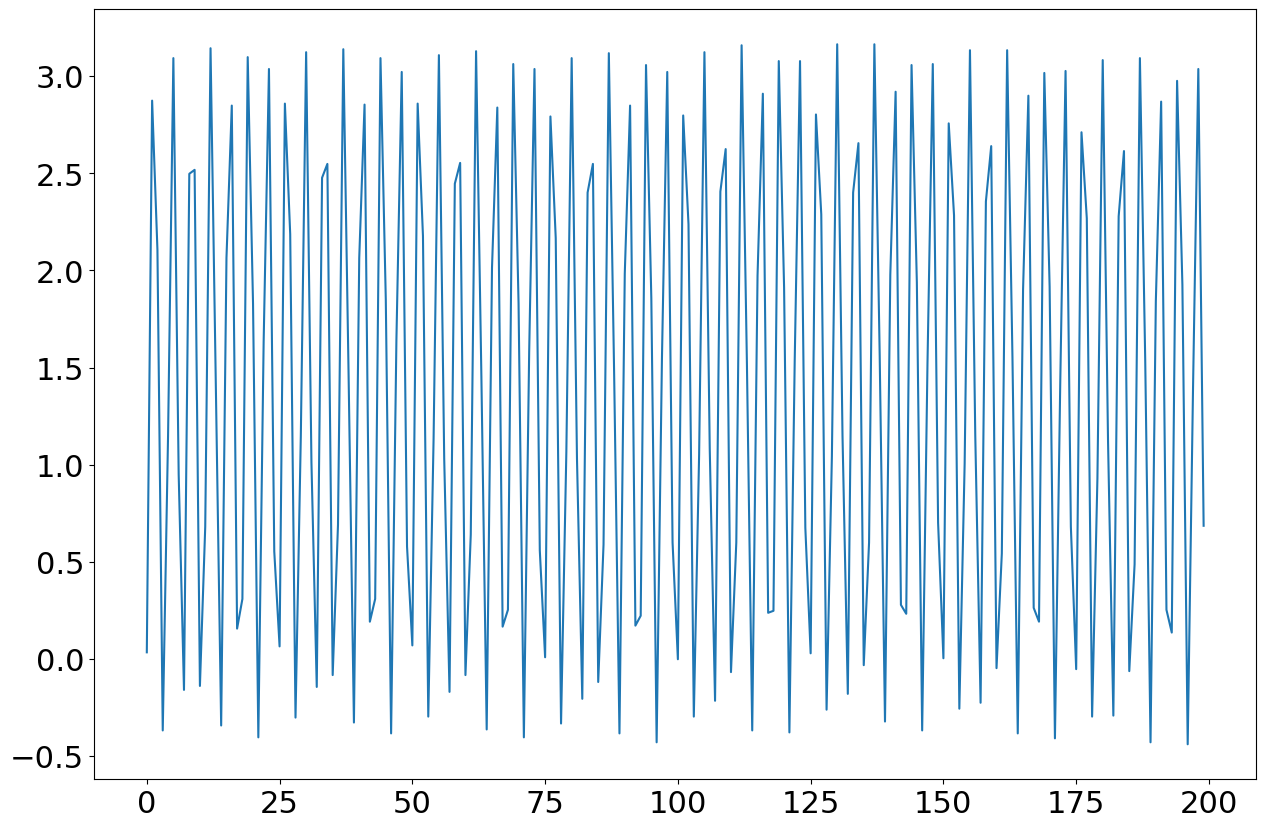

In [94]:
plt.plot(samples0)

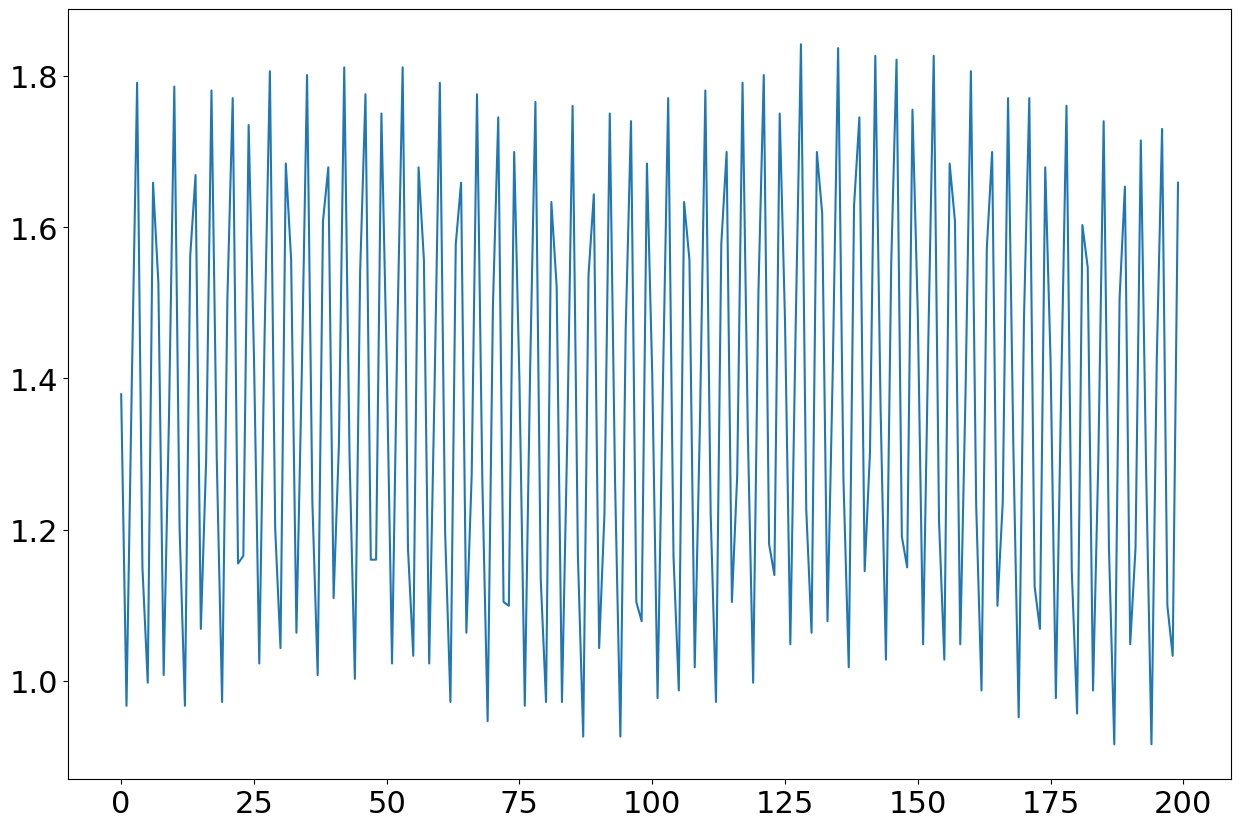

In [95]:
plt.plot(samples2)

In [68]:
data

{0: (np.float64(1.489773375151076),
  np.float64(1.4745014332848196),
  np.float64(1.4643201387073166),
  np.float64(1.4846827278623245),
  np.float64(1.5050453170173324),
  np.float64(1.4948640224398275),
  np.float64(1.479592080573573),
  np.float64(1.4948640224398275),
  np.float64(1.5254079061723402),
  np.float64(1.5101359643060839),
  np.float64(1.4999546697285808),
  np.float64(1.5254079061723402),
  np.float64(1.5559517899048512),
  np.float64(1.5406798480385966),
  np.float64(1.5254079061723402),
  np.float64(1.5508611426160996),
  np.float64(1.5712237317711075),
  np.float64(1.5559517899048512),
  np.float64(1.5406798480385966),
  np.float64(1.5610424371936045),
  np.float64(1.5814050263486124),
  np.float64(1.5559517899048512),
  np.float64(1.5406798480385966),
  np.float64(1.5559517899048512),
  np.float64(1.5712237317711075),
  np.float64(1.5610424371936045),
  np.float64(1.5508611426160996),
  np.float64(1.5814050263486124),
  np.float64(1.596676968214867),
  np.float64(1

In [ ]:
for vi in range(volts):
    
    myDAC.writeVoltage(volt_freq(vi))

    

    time.sleep(0.1)

    

In [15]:
i_anode = [] #anode current
error = []
counter = 0 #used to count the amount of unstable readings mitigated

for v in tqdm(v_anode):
    
    myDAC.writeVoltage(v)
    
    current = [] #temporary list to store current values that will be averaged
    err = [] #temp list to uncertainty values
    i = 0
    
    while i < 10:  #taking the mean of ten values
        ser.write(data("&S"))
        ans = ser.readline().decode("utf-8").rstrip().split(',')
        stable = ans[0]  #stability
        rangee = ans[1] #range
        num = float(ans[2]) #value
        unit = ans[3] #unit of the value
        
        if stable == '&S=':
            current.append(scaling(num, unit))
            err.append(error_range(num, unit, rangee))
            i+=1
        else:
            time.sleep(3)
            counter+=1
            print(ans, counter)
            
    i_anode.append(np.mean(current))
    error.append(np.mean(err))
    time.sleep(0.1)

i_anode = np.abs(i_anode)
counter

 73%|██████████████████████████████████████████████████████████▏                     | 485/667 [01:30<00:33,  5.44it/s]

['&S>', 'Range=002nA', '-2.1018', 'nA'] 1


 73%|██████████████████████████████████████████████████████████▎                     | 486/667 [01:36<05:59,  1.99s/it]

['&S*', 'Range=020nA', '-21.018', 'nA'] 2


100%|████████████████████████████████████████████████████████████████████████████████| 667/667 [02:10<00:00,  5.11it/s]


2

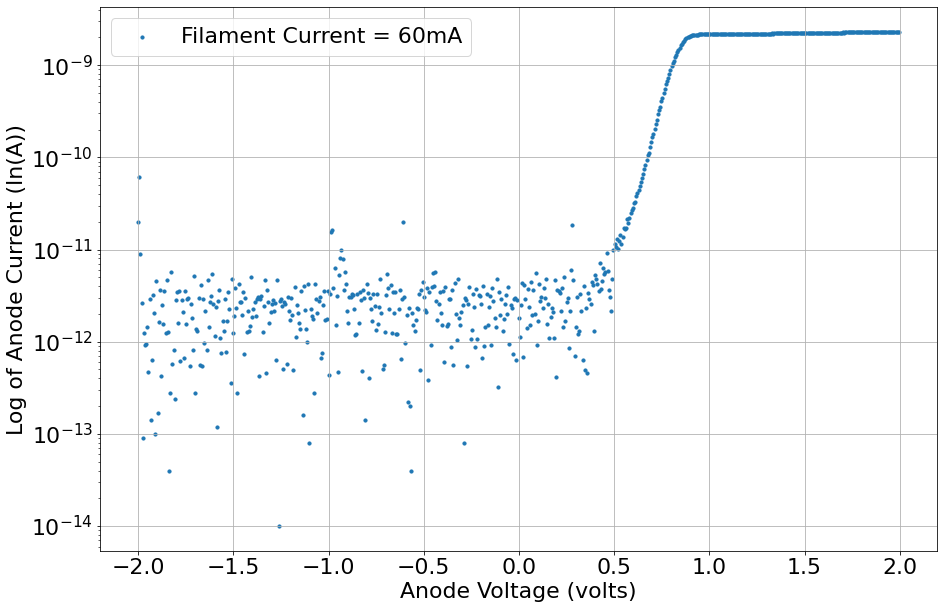

In [16]:
plt.yscale('log')
plt.scatter(volts, i_anode, label='Filament Current = 60mA',s = 10)
plt.grid()
plt.xlabel('Anode Voltage (volts)')
plt.ylabel('Log of Anode Current (ln(A))')
#plt.ylim(10e-14, 10e-3)
plt.legend()
#plt.vlines([0, 0.15, -0.15, 0.48, -0.48], ymin = 0, ymax=10e-4)

In [19]:
plot_df =pd.DataFrame({ "Anode Voltage": volts, "Anode Current": i_anode, 'Uncertainty': error })
plot_df

,Anode Voltage,Anode Current,Uncertainty
0,-2.000,1.987000e-11,1.006000e-13
1,-1.994,6.167000e-11,2.466800e-13
2,-1.988,8.870000e-12,3.548000e-14
3,-1.982,2.630000e-12,1.628000e-14
4,-1.976,9.000000e-14,2.740000e-14
...,...,...,...
662,1.972,2.292100e-09,4.584200e-12
663,1.978,2.286400e-09,4.572800e-12
664,1.984,2.291700e-09,4.583400e-12
665,1.990,2.293600e-09,4.587200e-12


In [20]:
plot_df.to_csv('60mA curve.csv')